# Previously...


---



### Preparação e pré-processamento dos dados

Nesta etapa, importamos bibliotecas essenciais para o processamento de linguagem natural (NLTK e Pandas) e preparamos os dados para análise.

- **Lista de documentos**: Trabalhamos com uma lista de frases que serão analisadas.
- **Download de recursos NLTK**: Baixamos as stopwords e o tokenizador.
- **Pré-processamento**: Utilizamos uma função que realiza a tokenização (separa o texto em palavras), normalização (conversão para minúsculas) e remoção de stopwords (palavras irrelevantes, como preposições) e pontuação.
- **DataFrame**: Criamos um DataFrame para armazenar os documentos originais e os documentos processados, prontos para as etapas seguintes de análise.

**Essas etapas já foram abordadas em aulas anteriores!**

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Baixar stop words do NLTK
nltk.download('stopwords')

# Baixar tokenizador
nltk.download('punkt')

# Lista de stop words em português
stop_words_pt = stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
# Lista de documentos
documents = [
    "A inteligência artificial é o futuro.",
    "O aprendizado de máquina é uma parte da IA.",
    "Robôs estão se tornando cada vez mais avançados.",
    "A análise de dados é fundamental na ciência de dados.",
    "O big data está revolucionando a ciência.",
    "Robôs e inteligência artificial são o futuro.",
    "Nosso futuro será distópico.",
    "Nosso passado é glorioso.",
    "Os robôs estão se tornando cada vez mais inteligentes.",
    "Ciência da Computação é o curso do futuro!"
]

# Função para tokenizar, normalizar e remover stopwords e pontuação
def preprocess_document(doc):
    # Tokenização e normalização (lower case)
    tokens = word_tokenize(doc.lower())
    # Remoção de stopwords e pontuação
    tokens = [word for word in tokens if word not in stop_words_pt and word not in string.punctuation]
    return tokens

# Aplicando o pré-processamento nos documentos
processed_documents = [preprocess_document(doc) for doc in documents]


### Vetorização com TF-IDF

Aqui utilizamos o modelo **TF-IDF (Term Frequency - Inverse Document Frequency)** para converter os documentos em vetores numéricos, representando a importância de cada termo em relação ao corpus.

- **TF-IDF**: O modelo TF-IDF calcula a relevância de uma palavra em um documento, levando em conta a frequência da palavra no documento (TF) e a frequência inversa nos outros documentos do corpus (IDF), penalizando termos muito comuns.
- **Vetorização**: Os documentos são transformados em vetores numéricos, onde cada termo é representado por uma dimensão no vetor.
- **DataFrame**: A matriz TF-IDF resultante é convertida para um DataFrame, permitindo uma visualização clara dos pesos atribuídos a cada termo nos diferentes documentos.

Isso fornece a base para cálculos de similaridade e outras análises quantitativas sobre o conteúdo textual.


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

texto_processado_csv = pd.read_csv("textos_processados.csv").head(10)

df_documents = pd.DataFrame({'Original Document': texto_processado_csv['documento'], 'Processed Document': texto_processado_csv['texto_processado']})

# Vetorização com TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(texto_processado_csv["texto_processado"])

# Convertendo a matriz TF-IDF para um dataframe para visualização
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

df_documents

,Original Document,Processed Document
0,Guia que se masturbou durante mergulho com tur...,guia turismo preso manhã desta gravado masturb...
1,Cidade de São Paulo terá queda de temperatura ...,temperatura deve despencar cidade paulo apenas...
2,Mega-Sena acumula e prêmio sobe para R$ 33 mil...,ninguém acertou seis dezenas sorteadas hoje co...
3,Mal cabe na palma da mão: diamante de 2.492 qu...,maiores diamantes encontrados hoje quilates ma...
4,Energia é retomada no Acre e em Rondônia após ...,ons operador nacional sistema elétrico confirm...
5,Moraes manda PF apreender celular de ex-assess...,ministro stf supremo tribunal federal alexandr...
6,Manual da Voepass impede comissários de regist...,anac agência nacional aviação civil identifico...
7,"'Muita água para rolar', diz candidato em Guar...",candidato prefeitura guarulhos lucas sanches p...
8,"Congresso promulga PEC da Anistia, com cota de...",congresso nacional promulgou nesta emenda cons...
9,"'STF não pode ser protagonista da lei', diz re...",designado relator proposta emenda constituição...


### Cálculo da Similaridade por Cosseno

Nesta etapa, calculamos a **similaridade por cosseno** entre os documentos representados pelos seus vetores TF-IDF.

- **Similaridade por cosseno**: Uma métrica que mede a similaridade entre dois vetores com base no ângulo entre eles. Valores próximos de 1 indicam alta similaridade, enquanto valores próximos de 0 indicam pouca ou nenhuma similaridade.
- **Conversão para DataFrame**: Para facilitar a visualização e interpretação, os valores de similaridade são organizados em um DataFrame, onde as linhas e colunas correspondem aos documentos comparados.

Essa métrica nos ajuda a entender quais documentos possuem conteúdo mais semelhante no corpus.


In [9]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculando a similaridade por cosseno entre os documentos
cosine_sim = cosine_similarity(tfidf_matrix)

# Convertendo para um DataFrame para melhor visualização
cosine_sim_df = pd.DataFrame(cosine_sim, index=[f"Doc{i+1}" for i in range(0,10)],
                             columns=[f"Doc{i+1}" for i in range(0,10)])

# Exibindo a matriz de similaridade por cosseno
cosine_sim_df


,Doc1,Doc2,Doc3,Doc4,Doc5,Doc6,Doc7,Doc8,Doc9,Doc10
Doc1,1.000000,0.032973,0.000697,0.002598,0.020329,0.022612,0.012510,0.017368,0.015885,0.014651
Doc2,0.032973,1.000000,0.009630,0.004581,0.035813,0.026905,0.016501,0.068647,0.053397,0.022354
Doc3,0.000697,0.009630,1.000000,0.012777,0.025910,0.008017,0.008391,0.009721,0.027203,0.005906
Doc4,0.002598,0.004581,0.012777,1.000000,0.013114,0.010539,0.032304,0.020455,0.039175,0.015231
Doc5,0.020329,0.035813,0.025910,0.013114,1.000000,0.043577,0.034195,0.031974,0.021777,0.020128
Doc6,0.022612,0.026905,0.008017,0.010539,0.043577,1.000000,0.023931,0.050712,0.042527,0.107762
Doc7,0.012510,0.016501,0.008391,0.032304,0.034195,0.023931,1.000000,0.030303,0.031870,0.019316
Doc8,0.017368,0.068647,0.009721,0.020455,0.031974,0.050712,0.030303,1.000000,0.049049,0.037105
Doc9,0.015885,0.053397,0.027203,0.039175,0.021777,0.042527,0.031870,0.049049,1.000000,0.149867
Doc10,0.014651,0.022354,0.005906,0.015231,0.020128,0.107762,0.019316,0.037105,0.149867,1.000000


### Visualização da Similaridade entre Documentos: Heatmap

Nesta etapa, utilizamos um **heatmap** para visualizar a similaridade entre os documentos com base na **similaridade por cosseno**.

- **Heatmap**: Um gráfico que usa cores para representar a intensidade da similaridade entre os documentos. Cada célula do gráfico representa a similaridade entre dois documentos, variando de valores baixos (menor similaridade) a altos (maior similaridade).
- **Cores**: Utilizamos o esquema de cores "Blues" para destacar as áreas com maior similaridade.
- **Anotações**: Cada célula do heatmap é anotada com o valor exato da similaridade, para facilitar a interpretação quantitativa.

O heatmap oferece uma visão intuitiva e imediata das relações entre os documentos, permitindo identificar rapidamente grupos de documentos similares.


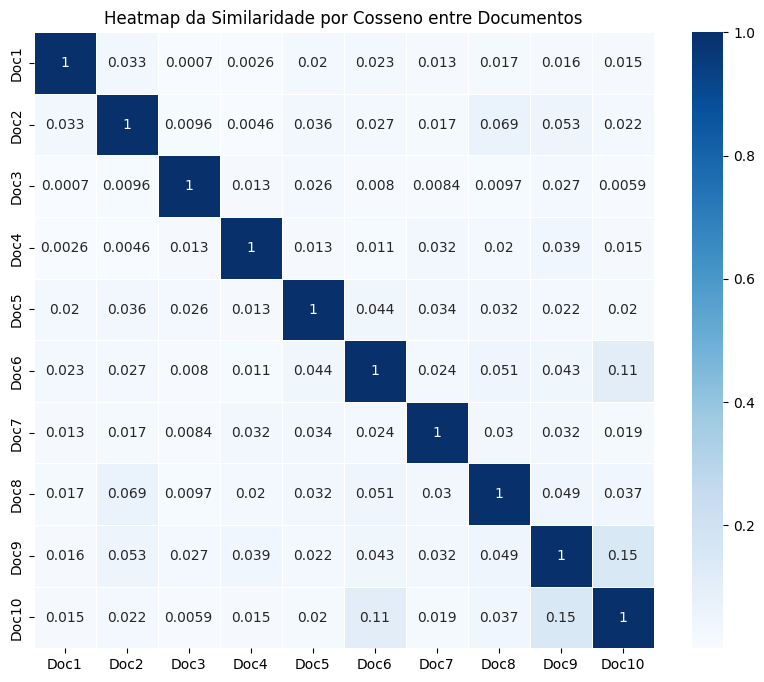

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando o tamanho da figura
plt.figure(figsize=(10, 8))

# Gerando o heatmap da matriz de similaridade por cosseno
sns.heatmap(cosine_sim_df, annot=True, cmap='Blues', linewidths=0.5)

# Definindo o título do heatmap
plt.title('Heatmap da Similaridade por Cosseno entre Documentos')

# Exibindo o gráfico
plt.show()


### Sistema de Recomendação de Documentos com Base em Similaridade

Nesta seção, implementamos um **sistema de recomendação de documentos** utilizando a similaridade por cosseno entre uma consulta fornecida pelo usuário e os documentos existentes.

- **Entrada do usuário**: O usuário insere um termo ou frase de busca.
- **Pré-processamento da consulta**: A consulta é processada da mesma forma que os documentos, incluindo tokenização, normalização e remoção de stopwords.
- **Vetor TF-IDF da consulta**: A consulta é transformada em um vetor TF-IDF usando o mesmo modelo que foi treinado com os documentos.
- **Cálculo da similaridade**: A similaridade por cosseno é calculada entre o vetor da consulta e os vetores TF-IDF dos documentos. Isso permite identificar quais documentos são mais relevantes para a consulta.
- **Ranqueamento das recomendações**: Os documentos são classificados em ordem decrescente de similaridade, e os mais relevantes são retornados ao usuário em um DataFrame.

Esse sistema de recomendação ajusta os resultados com base nos termos fornecidos, facilitando a recuperação dos documentos mais similares à consulta.


In [11]:

def recomendar_documentos_ajustada(consulta, df, tfidf_matrix, vectorizer):
    # Preprocessar a consulta da mesma maneira que os documentos
    consulta_processada = ' '.join(preprocess_document(consulta))

    # Vetorizar a consulta usando o mesmo modelo TF-IDF
    consulta_tfidf = vectorizer.transform([consulta_processada])

    # Calcular a similaridade por cosseno entre a consulta e os documentos
    similaridade = cosine_similarity(consulta_tfidf, tfidf_matrix)[0]

    # Obter os índices dos documentos ordenados pela similaridade
    indices_ranqueados = similaridade.argsort()[::-1]

    # Exibir os documentos mais similares com base no termo de busca e suas similaridades
    recomendacoes = pd.DataFrame({
        'Processed Document': df.loc[indices_ranqueados, 'Processed Document'],
        'Similaridade': similaridade[indices_ranqueados]
    })

    return recomendacoes

# Entrada pelo usuário
termo_busca = input("Digite os termos de busca: ")

# Obter as recomendações ajustadas com valores de similaridade
recomendacoes_df_ajustada = recomendar_documentos_ajustada(termo_busca, df_documents, tfidf_matrix, vectorizer)

recomendacoes_df_ajustada

Digite os termos de busca: masturbar


,Processed Document,Similaridade
9,designado relator proposta emenda constituição...,0.0
8,congresso nacional promulgou nesta emenda cons...,0.0
7,candidato prefeitura guarulhos lucas sanches p...,0.0
6,anac agência nacional aviação civil identifico...,0.0
5,ministro stf supremo tribunal federal alexandr...,0.0
4,ons operador nacional sistema elétrico confirm...,0.0
3,maiores diamantes encontrados hoje quilates ma...,0.0
2,ninguém acertou seis dezenas sorteadas hoje co...,0.0
1,temperatura deve despencar cidade paulo apenas...,0.0
0,guia turismo preso manhã desta gravado masturb...,0.0


### Considerações sobre o Uso de Lematização ou Stemming

No processo atual de pré-processamento dos documentos e da consulta do usuário, estamos utilizando uma abordagem simples que envolve a **remoção de stopwords** e **tokenização**, mas não estamos aplicando técnicas de lematização ou stemming.

### Como isso poderia alterar os resultados

- **Vantagens do uso de lematização**: A lematização pode melhorar a precisão das recomendações ao unificar diferentes formas gramaticais de uma mesma palavra. Isso resultaria em vetores TF-IDF mais compactos e generalizados, aumentando a similaridade entre documentos que falam sobre o mesmo tema com variações linguísticas.

- **Impacto no cálculo de similaridade**: Quando aplicamos lematização ou stemming, documentos que antes poderiam ser considerados ligeiramente diferentes podem acabar sendo considerados mais semelhantes. Isso ocorre porque palavras relacionadas semântica ou gramaticalmente serão tratadas como idênticas no cálculo de TF-IDF. Assim, os resultados das recomendações podem ser mais coesos e menos fragmentados.

- **Possível desvantagem do stemming**: O stemming pode ser muito agressivo, agrupando palavras que, na realidade, têm significados diferentes. Isso poderia levar a recomendações menos precisas, especialmente em textos com vocabulário mais rico ou específico.

Portanto, o uso de **lematização** pode ser uma escolha mais apropriada para melhorar a qualidade dos resultados em sistemas de recomendação baseados em similaridade, enquanto o **stemming** poderia ser aplicado em contextos onde a simplicidade e a performance são mais importantes do que a precisão semântica.

---

### Clusterização de Documentos com K-Means

Abaixo utilizamos o algoritmo **K-Means** para agrupar os documentos em diferentes clusters com base nos seus vetores TF-IDF.

- **Algoritmo K-Means**: O K-Means é um algoritmo de clusterização que agrupa os dados em **K clusters** distintos. Ele atribui cada documento ao cluster mais próximo com base nas distâncias entre seus vetores TF-IDF e os centróides dos clusters.
- **Número de clusters**: Inicialmente, definimos o número de clusters como 3, porém esse valor pode ser ajustado conforme a necessidade. O valor de `random_state` garante que o resultado seja reproduzível.
- **Rotulagem dos documentos**: Após aplicar o K-Means, cada documento é rotulado com o cluster ao qual pertence, e essa informação é adicionada ao DataFrame original.

Ao final, podemos ver a relação entre os documentos originais e os clusters aos quais foram atribuídos, facilitando a análise de agrupamento por temas ou similaridade semântica.


In [12]:
from sklearn.cluster import KMeans

# Definindo o número de clusters (podemos testar com 3 inicialmente)
num_clusters = 3

# Aplicando o KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Adicionando as labels de clusters ao DataFrame original
df_documents['Cluster'] = kmeans.labels_

# Exibindo os documentos e seus respectivos clusters
df_documents[['Original Document', 'Cluster']]


,Original Document,Cluster
0,Guia que se masturbou durante mergulho com tur...,2
1,Cidade de São Paulo terá queda de temperatura ...,2
2,Mega-Sena acumula e prêmio sobe para R$ 33 mil...,0
3,Mal cabe na palma da mão: diamante de 2.492 qu...,0
4,Energia é retomada no Acre e em Rondônia após ...,2
5,Moraes manda PF apreender celular de ex-assess...,1
6,Manual da Voepass impede comissários de regist...,0
7,"'Muita água para rolar', diz candidato em Guar...",2
8,"Congresso promulga PEC da Anistia, com cota de...",1
9,"'STF não pode ser protagonista da lei', diz re...",1


### Visualização dos Clusters

Como os dados vetoriais gerados pela vetorização TF-IDF podem ser de alta dimensionalidade, é necessário reduzir essa dimensionalidade para facilitar a visualização. Nesta etapa, utilizamos a **Análise de Componentes Principais (PCA)** para reduzir os vetores TF-IDF a duas dimensões e, assim, plotar os clusters em um gráfico 2D.

- **PCA (Principal Component Analysis)**: O PCA é uma técnica de redução de dimensionalidade que projeta os dados em um espaço de menor dimensão, preservando a maior parte da variabilidade original. Aqui, reduzimos os vetores TF-IDF para 2 componentes principais, o que nos permite visualizá-los em um gráfico 2D.
- **Mapeamento de cores**: Utilizamos um mapa de cores que se ajusta automaticamente ao número de clusters, garantindo que cada grupo de documentos seja representado por uma cor distinta no gráfico.
- **Plotagem dos clusters**: Cada documento é representado como um ponto no gráfico, e a cor de cada ponto indica a qual cluster o documento pertence. O gráfico nos dá uma visão intuitiva de como os documentos estão agrupados com base na similaridade semântica capturada pelos vetores TF-IDF.

A visualização em 2D ajuda a interpretar a distribuição dos documentos entre os clusters, facilitando a análise dos padrões e relações entre os grupos.


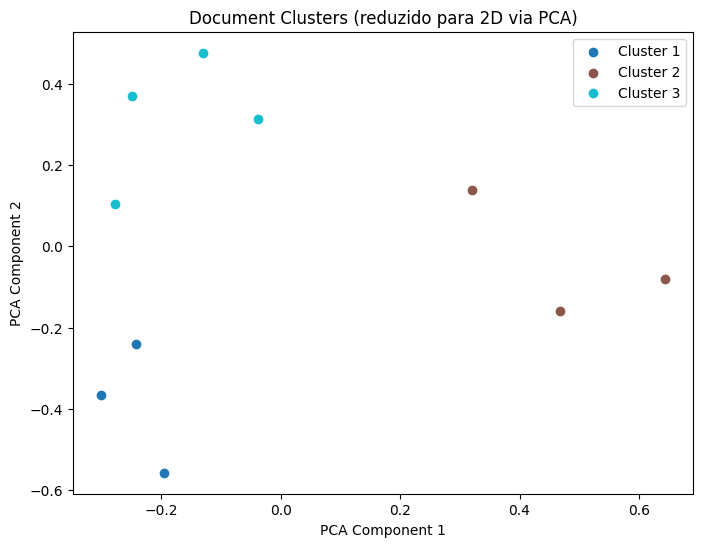

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Reduzindo a dimensionalidade para 2 componentes principais
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())

# Plotando os clusters em um gráfico 2D
plt.figure(figsize=(8, 6))

# Usando um mapa de cores com base no número de clusters
cmap = plt.get_cmap('tab10')  # Escolha um mapa de cores (ex.: 'tab10', 'viridis', 'plasma', etc.)
colors = [cmap(i) for i in np.linspace(0, 1, num_clusters)]

# Plotando os pontos e colorindo de acordo com os clusters
for i in range(num_clusters):
    points = reduced_features[df_documents['Cluster'] == i]
    plt.scatter(points[:, 0], points[:, 1], c=[colors[i]], label=f'Cluster {i+1}')

plt.title('Document Clusters (reduzido para 2D via PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()



### Interpretação dos pontos no gráfico:

- Cada ponto no gráfico corresponde a um documento. A cor do ponto indica o **cluster** ao qual o documento pertence, com base no algoritmo K-Means.
- Documentos que estão mais próximos entre si no gráfico são mais similares, enquanto documentos mais distantes uns dos outros possuem características mais distintas.
- A separação visual entre clusters reflete o grau de similaridade entre os documentos: documentos em um mesmo cluster compartilham termos importantes, enquanto documentos de clusters diferentes possuem menor sobreposição de termos.



**Concluindo:**

A Análise de Componentes Principais (PCA) é uma técnica de redução de dimensionalidade amplamente utilizada em aprendizado de máquina e estatística. O principal objetivo do PCA é transformar um conjunto de dados de alta dimensionalidade em um espaço de menor dimensão, preservando a maior quantidade possível de variabilidade dos dados originais.

Ao aplicar PCA a um conjunto de vetores TF-IDF, você obtém uma representação mais compacta dos documentos. Vamos imaginar que você tenha documentos representados por vetores TF-IDF em um espaço de 1000 dimensões (1000 palavras diferentes no corpus). Após aplicar o PCA, você pode reduzir isso para 2 dimensões, o que permite visualizar os documentos em um gráfico de dispersão. Os documentos que estão mais próximos uns dos outros no gráfico têm vetores TF-IDF semelhantes, sugerindo que eles compartilham muitos termos importantes.

# Na próxima aula...

In [14]:
import gensim
from gensim.models import Word2Vec

# Usando os documentos já pré-processados
# Treinando o modelo Word2Vec com os documentos processados
model = Word2Vec(sentences=processed_documents, vector_size=100, window=5, min_count=1, workers=4)

# Exemplo: Calculando a similaridade entre palavras
word1 = 'ciência'
word2 = 'computação'

# Verificando se as palavras estão no vocabulário do modelo
if word1 in model.wv and word2 in model.wv:
    similarity = model.wv.similarity(word1, word2)
    print(f"A similaridade entre '{word1}' e '{word2}' é: {similarity}")
else:
    print(f"Uma ou ambas as palavras não estão no vocabulário.")




A similaridade entre 'ciência' e 'computação' é: -0.01938708685338497


In [ ]:
# Podemos também explorar o modelo, verificando as palavras mais similares a um determinado termo
word_to_explore = 'computação'
if word_to_explore in model.wv:
    similar_words = model.wv.most_similar(word_to_explore)
    print(f"Palavras mais similares a '{word_to_explore}': {similar_words}")
else:
    print(f"A palavra '{word_to_explore}' não está no vocabulário.")

Palavras mais similares a 'computação': [('glorioso', 0.19615353643894196), ('robôs', 0.122956782579422), ('inteligentes', 0.08298070728778839), ('dados', 0.08073590695858002), ('fundamental', 0.06544854491949081), ('futuro', 0.05431847274303436), ('distópico', 0.03175165504217148), ('análise', 0.01659846119582653), ('vez', 0.01594768837094307), ('parte', 0.0132919792085886)]


**Em ambos os casos, temos uma amostra de exemplo muito pequena, que não captura corretamente o valor semântico das palavras. Se testarem com suas bases, devem ter um resultado melhor!**